In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
%matplotlib inline


In [23]:
narrow_data = np.load('data/DAW_DATA_100_sims.npy').item()
broad_data = np.load('data/DAW_DATA_100_sims_BROAD_REWARDS.npy').item()

alpha_data = np.load('data/DAW_DATA_100_sims_BROAD_REWARDS_alpha_1.npy').item()


In [34]:
alpha_data[0]['R1']

array([[1, 1, 1, ..., 2, 1, 2],
       [2, 2, 2, ..., 1, 2, 1],
       [2, 1, 1, ..., 2, 1, 1],
       ...,
       [2, 2, 2, ..., 1, 2, 1],
       [2, 1, 1, ..., 1, 1, 2],
       [2, 2, 1, ..., 2, 2, 1]], dtype=uint8)

In [39]:
def var_main(read_data,n_simulations=100):


    w_to_probs= {}
    w_to_vars= {}

    for w in read_data:

        prob_r1_rew_vect = np.zeros(n_simulations)
        var_r1_rew_vect = np.zeros(n_simulations)
        prob_r1_no_rew_vect = np.zeros(n_simulations)
        var_r1_no_rew_vect = np.zeros(n_simulations)


        R1 = read_data[w]['R1']
        S2 = read_data[w]['S2']
        RW = read_data[w]['Rw']

        for sim in range(n_simulations):
            R1_offset = R1[sim,1:]
            S2_offset = S2[sim, :-1]
            RW_offset = RW[sim, :-1]

            R1_masked = R1_offset[(S2_offset==1) & (RW_offset==1)]
            prob_r1_rew_vect[sim] = np.sum(R1_masked==2)/len(R1_masked)

            var_r1_rew_vect[sim] = prob_r1_rew_vect[sim]*len(R1_masked)*(1.0-prob_r1_rew_vect[sim])

            R1_masked = R1_offset[(S2_offset==1) & (RW_offset==0)]
            prob_r1_no_rew_vect[sim] = np.sum(R1_masked==2)/len(R1_masked)

            var_r1_no_rew_vect[sim] = prob_r1_no_rew_vect[sim]*len(R1_masked)*(1.0-prob_r1_no_rew_vect[sim])

        w_to_probs[w] = (prob_r1_rew_vect, prob_r1_no_rew_vect)
        w_to_vars[w] = (var_r1_rew_vect, var_r1_no_rew_vect)
    
    return (w_to_probs, w_to_vars) 



def plot_probs(w_to_probs, broad=False):
#     plt.figure()
    sorted_keys = sorted(w_to_probs.keys())
    plt.errorbar(sorted_keys, [np.mean(w_to_probs[key][0]) for key in sorted_keys],
                 yerr=[np.std(w_to_probs[key][0]) for key in sorted_keys], label='Pr(R1=1|S2=1 & RW=1)')
    plt.errorbar(sorted_keys, [np.mean(w_to_probs[key][1]) for key in sorted_keys],
             yerr=[np.std(w_to_probs[key][1]) for key in sorted_keys], label='Pr(R1=1|S2=1 & RW=0)')
    plt.ylim((.2, .8))
    plt.ylabel('Pr[R1]')
    
    if broad:
        s = 'Pr R1|S2=1 for BROAD reward'
    else:
        s= 'Pr R1|s2=1 for NARROW reward'
        
    plt.title(s)

    plt.xlabel('w value')
    plt.legend()
#     plt.show()
    
def plot_vars(w_to_vars, broad=False):
#     plt.figure()
    sorted_keys = sorted(w_to_vars.keys())
    plt.errorbar(sorted_keys, [np.mean(w_to_vars[key][0]) for key in sorted_keys],
                 yerr=[np.std(w_to_vars[key][0]) for key in sorted_keys], label='Var(R1=1|S2=1 & RW=1)')
    plt.errorbar(sorted_keys, [np.mean(w_to_vars[key][1]) for key in sorted_keys],
             yerr=[np.std(w_to_vars[key][1]) for key in sorted_keys], label='Var(R1=1|S2=1 & RW=0)')
    if broad:
        s = 'Var  R1|S2=1 for BROAD reward'
    else:
        s= 'Var R1|S2=1 for NARROW reward'
    plt.ylabel('Var[R1]') 
    plt.title(s)
    plt.xlabel('w value')
    plt.legend()
#     plt.show()
    

In [40]:
narrow_prob,narrow_var = var_main(narrow_data)
broad_prob,broad_var = var_main(broad_data)

alpha_prob,alpha_var = var_main(alpha_data)

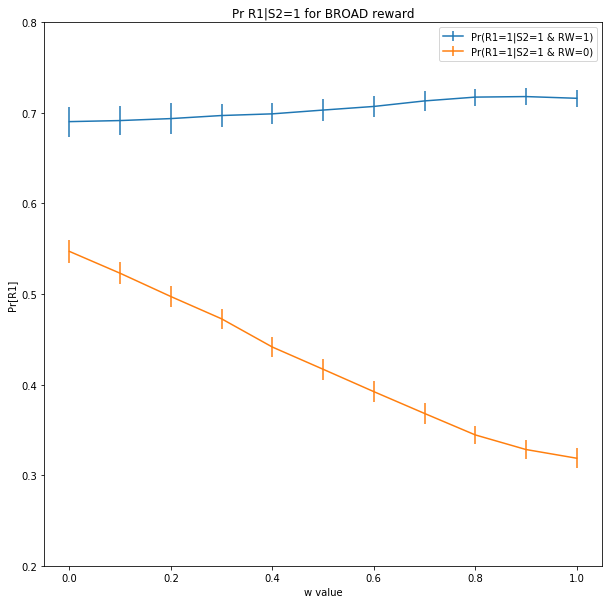

In [41]:
plt.figure(figsize=(10,10))

plot_probs(alpha_prob, True)
plt.savefig('Alpha1_probs.png')

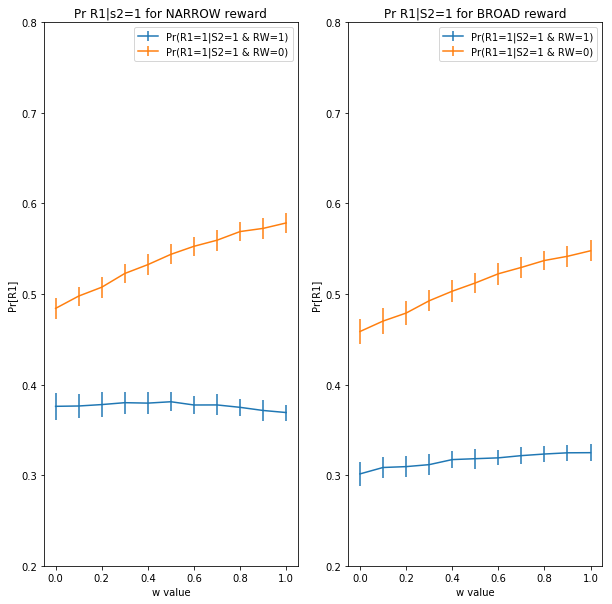

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plot_probs(narrow_prob, False)
plt.subplot(1,2,2)
plot_probs(broad_prob, True)
plt.savefig('Choice Probs_S2=1')

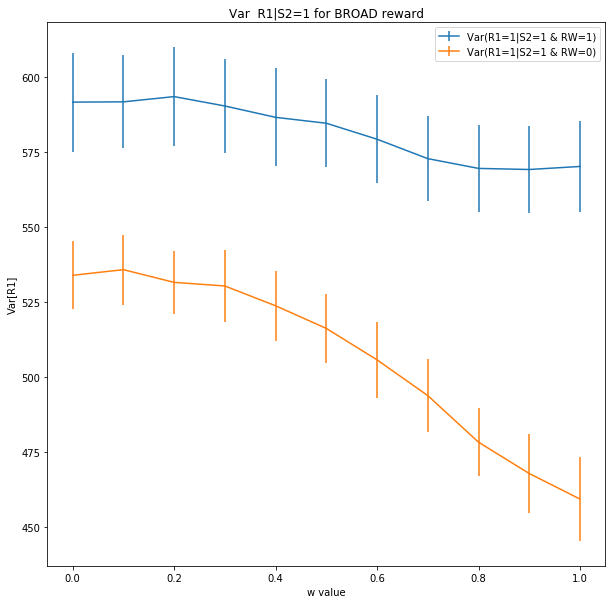

In [30]:
plt.figure(figsize=(10,10))

plot_vars(alpha_var, True)
plt.savefig('Alpha1_vars.png')

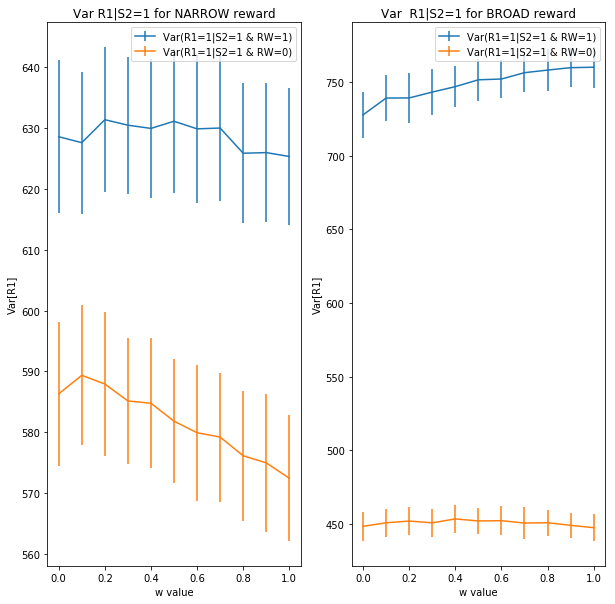

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plot_vars(narrow_var, False)
plt.subplot(1,2,2)
plot_vars(broad_var, True)
plt.savefig('Choice Vars_S2=1')

# Actual Human Data

In [3]:
data_in = np.load('DAW_human_data.npy').item()


In [4]:
human_dict = {}
# subjects x trials x [R1,RW,S2]

trial_data = data_in['trial_data']
w_vals = np.squeeze(data_in['subject_fits'])
interaction_vals = np.squeeze(data_in['interaction'])
maineffect_vals = np.squeeze(data_in['maineffect'])

for i_sub in range(len(w_vals)):
    human_dict[w_vals[i_sub]] = {}
    human_dict[w_vals[i_sub]]['R1'] = trial_data[i_sub,:,0]
    human_dict[w_vals[i_sub]]['Rw'] = trial_data[i_sub,:,1]
    human_dict[w_vals[i_sub]]['S2'] = trial_data[i_sub,:,2]
    human_dict[w_vals[i_sub]]['common'] = trial_data[i_sub,:,3]
    
n_subjects = len(w_vals)

In [7]:
human_dict

{2.6381738261768234e-09: {'R1': array([ 2.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,
          2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
          2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
          2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,
          2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,
          2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,
          2.,  2.,  1.,  2.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  1.,  2.,
          2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2., -1.,  2.,  2.,  2.,
          1.,  1.,  2.,  1.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  1.,  2.,
          2.,  1.,  2.,  1.,  1.,  1.,  2.,  2.]),
  'Rw': array([1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
         0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
         1., 0.,

In [15]:
def human_var(data_dict):
    w_to_probs= {}
    w_to_vars= {}

    for w in data_dict:

        R1 = data_dict[w]['R1']
        S2 = data_dict[w]['S2']
        RW = data_dict[w]['Rw']
        common = data_dict[w]['common']

        R1_offset = R1[1:]
        S2_offset = S2[:-1]
        RW_offset = RW[:-1]
        R_minus1 = R1[:-1]
        common_offset = common[:-1]
    
        # given reward
        common_rewarded = common_offset[RW_offset==1]
        R_minus1_rewarded = R_minus1[RW_offset==1]
        R1_offset_rewarded = R1_offset[RW_offset==1]
#         S2_offset_rewarded = S2_offset[RW_offset==1]
        
        # same choice
        same_choice = np.equal(R_minus1_rewarded, R1_offset_rewarded).astype(int)
        prob_r1_rew = np.sum(((same_choice==1)&(common_rewarded==1)))/len(same_choice)
#         prob_r1_rew = np.sum(((S2_rewarded==2)&(R1_rewarded==2))|((S2_rewarded==1)&(R1_rewarded==1)))/len(R1_rewarded)
        
#         R1_masked = R1_offset[(S2_offset==2) & (RW_offset==1)]
#         prob_r1_rew = np.sum(R1_masked==2)/len(R1_masked)

        var_r1_rew = prob_r1_rew*len(same_choice)*(1.0-prob_r1_rew)
        
        # not given reward
        common_not_rewarded = common_offset[RW_offset==0]
        R_minus1_not_rewarded = R_minus1[RW_offset==0]
        R1_offset_not_rewarded = R1_offset[RW_offset==0]
#         S2_not_rewarded = S2_offset[RW_offset==0]
#         prob_r1_no_rew = np.sum(((S2_not_rewarded==2)&(R1_not_rewarded==2))|((S2_not_rewarded==1)&(R1_not_rewarded==1)))/len(R1_not_rewarded)
# same choice
        same_choice_nr = np.equal(R_minus1_not_rewarded, R1_offset_not_rewarded).astype(int)
        prob_r1_no_rew = np.sum(((same_choice_nr==1)&(common_not_rewarded==1)))/len(same_choice_nr)

        var_r1_no_rew = prob_r1_no_rew*len(same_choice_nr)*(1.0-prob_r1_no_rew)

        w_to_probs[w] = (prob_r1_rew, prob_r1_no_rew)
        w_to_vars[w] = (var_r1_rew, var_r1_no_rew)
    
    return (w_to_probs, w_to_vars)

In [16]:
human_probs, human_vars = human_var(human_dict)

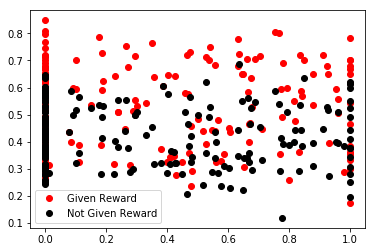

In [20]:
plt.figure()
sorted_keys = sorted(human_probs.keys())
plt.plot(sorted_keys, [human_probs[key][0] for key in sorted_keys], 'ro', label='Given Reward')
plt.plot(sorted_keys, [human_probs[key][1] for key in sorted_keys], 'ko', label='Not Given Reward')
plt.legend()
plt.show()

In [24]:
spearmanr(sorted_keys, [human_probs[key][1] for key in sorted_keys])

SpearmanrResult(correlation=-0.11450804347512991, pvalue=0.10910171146472976)

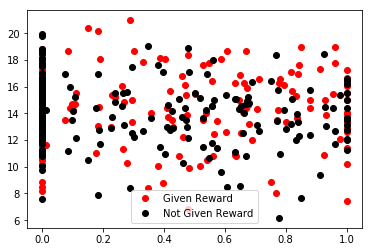

In [17]:
plt.figure()
sorted_keys = sorted(human_vars.keys())
plt.plot(sorted_keys, [human_vars[key][0] for key in sorted_keys], 'ro', label='Given Reward')
plt.plot(sorted_keys, [human_vars[key][1] for key in sorted_keys], 'ko', label='Not Given Reward')
plt.legend()
plt.show()

In [29]:
len(human_vars)

196

In [18]:
len(interaction_vals)

197

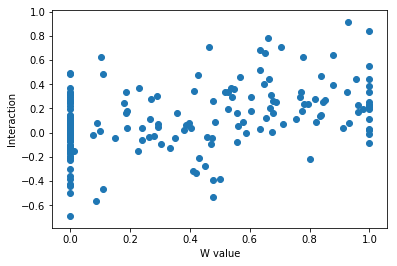

In [18]:
plt.figure()
plt.scatter(w_vals, interaction_vals)
plt.xlabel('W value')
plt.ylabel('Interaction')
plt.show()

In [27]:
spearmanr(w_vals, interaction_vals)

SpearmanrResult(correlation=0.45493332851987367, pvalue=1.868027606236986e-11)

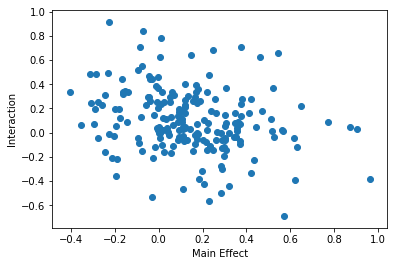

In [24]:
plt.figure()
plt.scatter(maineffect_vals, interaction_vals)
plt.xlabel('Main Effect')
plt.ylabel('Interaction')
plt.show()

In [26]:
spearmanr(maineffect_vals, interaction_vals)

SpearmanrResult(correlation=-0.26045689221161555, pvalue=0.00021865518297142374)

In [30]:
len(w_vals)

197

In [31]:
len(np.unique(w_vals))

197

(array([ 1.,  1.,  0.,  2.,  5.,  3.,  3.,  6.,  5.,  3.,  0.,  6.,  3.,
         9., 12., 12.,  8.,  4., 14., 10.,  7., 10.,  8.,  7.,  4., 12.,
         5.,  6.,  8.,  1.,  4.,  1.,  1.,  3.,  2.,  3.,  0.,  3.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([-0.40608466, -0.37869796, -0.35131127, -0.32392457, -0.29653788,
        -0.26915119, -0.24176449, -0.2143778 , -0.1869911 , -0.15960441,
        -0.13221772, -0.10483102, -0.07744433, -0.05005763, -0.02267094,
         0.00471576,  0.03210245,  0.05948914,  0.08687584,  0.11426253,
         0.14164923,  0.16903592,  0.19642261,  0.22380931,  0.251196  ,
         0.2785827 ,  0.30596939,  0.33335608,  0.36074278,  0.38812947,
         0.41551617,  0.44290286,  0.47028956,  0.49767625,  0.52506294,
         0.55244964,  0.57983633,  0.60722303,  0.63460972,  0.66199641,
         0.68938311,  0.7167698 ,  0.7441565 ,  0.77154319,  0.79892988,
         0.82631658,  0.85370327,  0.88108997,  0.90847666,

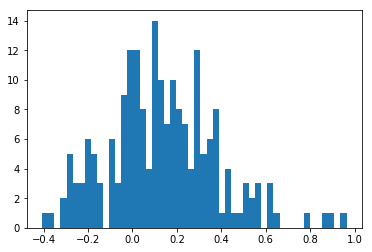

In [87]:
plt.hist(maineffect_vals,50)

In [38]:
R1_masked

NameError: name 'R1_masked' is not defined

In [9]:
np.equal([5,6,7], [0,6,7]).astype(int)

array([0, 1, 1])